In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import torchvision
from torchvision import datasets, transforms

In [ ]:
from torch.utils.data import DataLoader
## efficient in creating batches and in the process of iterationg through batches during training

In [ ]:
dir(datasets)
help(datasets.FashionMNIST)

Help on class FashionMNIST in module torchvision.datasets.mnist:

class FashionMNIST(MNIST)
 |  FashionMNIST(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.
 |  
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where ``FashionMNIST/raw/train-images-idx3-ubyte``
 |          and  ``FashionMNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      download (bool, optional): If True, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in a PIL image
 | 

In [ ]:
train_data = datasets.FashionMNIST('.data', train = True, download = True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8157634.32it/s] 


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 136950.18it/s]


Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 514816.65it/s] 


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4939894.07it/s]

Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



In [ ]:
len(train_data)

60000

In [ ]:
train_data.data.shape
train_data.targets
train_data.classes
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data[0][0]

In [ ]:
import matplotlib.pyplot as plt

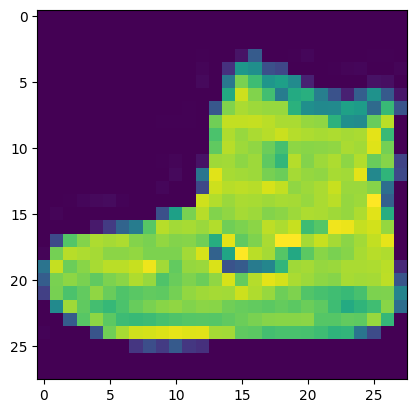

In [ ]:
plt.imshow(train_data[0][0])

In [ ]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
transform = transforms.ToTensor()
transform1 = transforms.Compose((transforms.ToTensor(), transforms.Normalize((0.5), (0.5))))

In [ ]:
train_data = datasets.FashionMNIST('.data', train = True, transform = transform1)

## ToTensor() -- converts images into tensor and then standardize your dataset (PIL)

In [ ]:
train_data[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [ ]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
transform2 = transforms.Compose((transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))))

In [ ]:
train_set = datasets.CIFAR10('.data', train = True, transform = transform2)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
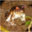

In [ ]:
train_set.data[0]

In [ ]:
train_set[0]
train_set.targets
train_set.classes
train_set.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [ ]:
len(train_data)

60000

In [ ]:
train_iter = DataLoader(train_data, batch_size = 100, shuffle = True)

In [ ]:
type(train_iter)

torch.utils.data.dataloader.DataLoader

In [ ]:
for features, labels in train_iter:
  print(labels)
  break

tensor([1, 3, 1, 4, 1, 0, 2, 5, 2, 9, 6, 3, 0, 3, 5, 5, 7, 3, 5, 8, 5, 2, 0, 4,
        2, 1, 7, 7, 8, 2, 3, 3, 7, 3, 8, 1, 8, 6, 5, 7, 8, 6, 7, 2, 4, 2, 6, 1,
        0, 3, 4, 9, 2, 5, 4, 1, 0, 2, 6, 4, 2, 3, 6, 8, 1, 7, 6, 0, 0, 8, 8, 6,
        2, 3, 3, 0, 3, 2, 9, 0, 0, 5, 0, 5, 0, 8, 5, 0, 5, 6, 2, 6, 8, 0, 8, 0,
        5, 0, 2, 8])


In [ ]:
## nn.Linear()

In [ ]:
iterator = iter(train_iter)

In [ ]:
feat, lab = next(iterator)

In [ ]:
x = feat[0]

In [ ]:
x.shape

torch.Size([1, 28, 28])

In [ ]:
conv = nn.Conv2d(1, 6, 5)

In [ ]:
conv.weight.shape

torch.Size([6, 1, 5, 5])

In [ ]:
x1 = conv(x)

In [ ]:
x1.shape

torch.Size([6, 24, 24])

(N, C, H, W)

In [ ]:
pooling = nn.MaxPool2d(2, 2)

In [ ]:
x2 = pooling(x1)
x2.shape

torch.Size([6, 12, 12])

In [ ]:
x = feat[0]
x = nn.Conv2d(1, 6, 5)(x)
x = nn.MaxPool2d(2, 2)(x)
x = nn.Conv2d(6, 6, 5)(x)
x = nn.MaxPool2d(2, 2)(x)
x.shape

torch.Size([6, 4, 4])

In [ ]:
F.relu(x)

tensor([[[0.0000, 0.0000, 0.0011, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.2035],
         [0.0000, 0.0000, 0.0601, 0.1751],
         [0.0000, 0.0000, 0.0075, 0.0000]],

        [[0.6212, 0.6390, 0.5131, 0.4387],
         [0.4273, 0.2271, 0.2707, 0.1060],
         [0.6990, 0.6025, 0.4955, 0.4254],
         [0.7184, 0.6630, 0.6280, 0.6205]],

        [[0.2250, 0.2246, 0.2536, 0.4064],
         [0.2243, 0.0803, 0.0000, 0.1777],
         [0.0000, 0.0000, 0.0000, 0.0553],
         [0.1937, 0.3117, 0.3255, 0.3296]],

        [[0.0992, 0.0578, 0.0060, 0.0000],
         [0.0034, 0.0060, 0.0000, 0.2095],
         [0.0697, 0.0548, 0.2437, 0.3479],
         [0.0575, 0.0931, 0.1408, 0.1642]],

        [[0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0855, 0.2297, 0.1195],
         [0.2454, 0.3167, 0.4169, 0.4518],
         [0.0777, 0.0144, 0.0335, 0.0000]],

        [[0.4826, 0.4647, 0.3469, 0.4124],
         [0.2502, 0.2781, 0.2973, 0.3563],
         [0.4945, 0.2968, 0.2778, 0.2101],
 

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 6, 5)
    self.fc1 = nn.Linear(6*4*4, 80)
    self.fc2 = nn.Linear(80, 20)
    self.fc3 = nn.Linear(20, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool(x)
    x= self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)
    x = x.view(-1, 6*4*4) ## x.flatten() x.Flatten()
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)

    return x




In [ ]:
Model = CNN()

In [ ]:
x = feat[0]

In [ ]:
out = Model(feat)
out.shape

torch.Size([100, 10])

## Training

- Define Loss
- Optimizer

---

Forward pass \\
Backprop


## CrossEntropyLoss = Softmax + cross entropy loss

In [ ]:
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(), lr = 0.1, momentum= 0.9)

### 1 epoch = pass through entire dataset

### 1 iteration = pass through 1 batch


total points = 60000
batch size = 100
total batches = 600

In [ ]:
for epoch in range(3):
  total_correct_pts = 0
  for features, labels in train_iter:
    optimizer.zero_grad()
    output = Model(features)
    ls = Loss(output, labels)
    ls.backward()
    optimizer.step()

    corr = torch.argmax(output, axis = 1) == torch.as_tensor(labels)
    total_correct = torch.count_nonzero(corr)
    total_correct_pts += total_correct

  print(total_correct_pts/60000)





tensor(0.7142)
tensor(0.8220)
tensor(0.8309)


In [ ]:
test_data = datasets.FashionMNIST('.data', train = False, download = True, transform = transform1)

In [ ]:
test_iter = DataLoader(test_data, shuffle = False, batch_size = 100)

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
# with torch.no_grad()

In [ ]:
Model.eval()

# test_output = Model()

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=96, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)

In [ ]:
test_corr = 0
for data in test_iter:
  feat, lab = data
  test_out = Model(feat)

  curr_classes = torch.argmax(test_out, axis = 1) == torch.as_tensor(lab)
  tcd = torch.count_nonzero(curr_classes)
  test_corr += tcd

print(test_corr/10000)

tensor(0.8230)


In [ ]:
from torchvision import models

In [ ]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'